In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('train_features.csv')
val_df = pd.read_csv('validation_features.csv')

In [2]:
# Remove empty column '190'
train_df = train_df.drop(columns=['190'])
val_df = val_df.drop(columns=['190'])

In [3]:
# Separate features and labels
X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values

X_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
from sklearn.metrics import accuracy_score
# create a random forest classifier object with a fixed number of trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# define a range of node sizes to try
node_size_range = range(2, 102, 10)

# create an empty list to store the percentage error values
error_percentage_values = []

print(len(node_size_range))

# loop over the range of node sizes
for node_size in node_size_range:
    # set the minimum samples required to split a node to the current node size
    rfc.min_samples_split = node_size
    
    # fit the model to the training data
    rfc.fit(X_train, y_train)
    
    print("done")
    
    # use the model to predict on the test data
    y_pred = rfc.predict(X_val)
    
    # compute the accuracy score
    accuracy = accuracy_score(y_val, y_pred)
    
    # compute the percentage error
    error_percentage = (1 - accuracy) * 100
    
    # append the percentage error to the list of error percentage values
    error_percentage_values.append(error_percentage)

10
done
done
done
done
done
done
done
done
done
done


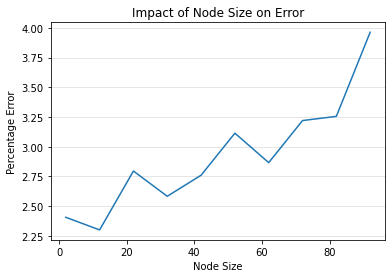

In [17]:
import matplotlib.pyplot as plt 
# plot the error percentage values as a function of the node size
plt.plot(node_size_range, error_percentage_values)
plt.xlabel('Node Size')
plt.ylabel('Percentage Error')
plt.title('Impact of Node Size on Error')
plt.grid(True, axis='y', alpha=0.4)
plt.show()